# Session 5

Classification

## Modelling case

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

## Dataset exploration

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pathlib import Path

# specifying file name
file = Path('data').joinpath('class.csv')

# setting pandas print options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# reading the file into Python
campaign = pd.read_csv(file)


# outputting the first ten rows of the dataset
campaign.head(n = 10)

age          job   marital          education  default housing loan   contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y
0   44  blue-collar   married           basic.4y  unknown     yes   no  cellular   aug         thu       210         1    999         0  nonexistent           1.4          93.444          -36.1      4.963       5228.1  0
1   53   technician   married            unknown       no      no   no  cellular   nov         fri       138         1    999         0  nonexistent          -0.1          93.200          -42.0      4.021       5195.8  0
2   28   management    single  university.degree       no     yes   no  cellular   jun         thu       339         3      6         2      success          -1.7          94.055          -39.8      0.729       4991.6  1
3   39     services   married        high.school       no      no   no  cellular   apr         fri       185         2    999         0  nonexistent          -1.8          93.075          -47.1      1.405       5099.1  0
4   55      retired   married           basic.4y       no     yes   no  cellular   aug         fri       137         1      3         1      success          -2.9          92.201          -31.4      0.869       5076.2  1
5   30   management  divorced           basic.4y       no     yes   no  cellular   jul         tue        68         8    999         0  nonexistent           1.4          93.918          -42.7      4.961       5228.1  0
6   37  blue-collar   married           basic.4y       no     yes   no  cellular   may         thu       204         1    999         0  nonexistent          -1.8          92.893          -46.2      1.327       5099.1  0
7   39  blue-collar  divorced           basic.9y       no     yes   no  cellular   may         fri       191         1    999         0  nonexistent          -1.8          92.893          -46.2      1.313       5099.1  0
8   36       admin.   married  university.degree       no      no   no  cellular   jun         mon       174         1      3         1      success          -2.9          92.963          -40.8      1.266       5076.2  1
9   27  blue-collar    single           basic.4y       no     yes   no  cellular   apr         thu       191         2    999         1      failure          -1.8          93.075          -47.1      1.410       5099.1  0

In [2]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [3]:
campaign.describe(include='all')

age     job  marital          education default housing   loan   contact  month day_of_week      duration      campaign         pdays      previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed             y
count   41188.00000   41188    41188              41188   41188   41188  41188     41188  41188       41188  41188.000000  41188.000000  41188.000000  41188.000000        41188  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  41188.000000
unique          NaN      12        4                  8       3       3      3         2     10           5           NaN           NaN           NaN           NaN            3           NaN             NaN            NaN           NaN           NaN           NaN
top             NaN  admin.  married  university.degree      no     yes     no  cellular    may         thu           NaN           NaN           NaN           NaN  nonexistent           NaN             NaN            NaN           NaN           NaN           NaN
freq            NaN   10422    24928              12168   32588   21576  33950     26144  13769        8623           NaN           NaN           NaN           NaN        35563           NaN             NaN            NaN           NaN           NaN           NaN
mean       40.02406     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN    258.285010      2.567593    962.475454      0.172963          NaN      0.081886       93.575664     -40.502600      3.621291   5167.035911      0.112654
std        10.42125     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN    259.279249      2.770014    186.910907      0.494901          NaN      1.570960        0.578840       4.628198      1.734447     72.251528      0.316173
min        17.00000     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN      0.000000      1.000000      0.000000      0.000000          NaN     -3.400000       92.201000     -50.800000      0.634000   4963.600000      0.000000
25%        32.00000     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN    102.000000      1.000000    999.000000      0.000000          NaN     -1.800000       93.075000     -42.700000      1.344000   5099.100000      0.000000
50%        38.00000     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN    180.000000      2.000000    999.000000      0.000000          NaN      1.100000       93.749000     -41.800000      4.857000   5191.000000      0.000000
75%        47.00000     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN    319.000000      3.000000    999.000000      0.000000          NaN      1.400000       93.994000     -36.400000      4.961000   5228.100000      0.000000
max        98.00000     NaN      NaN                NaN     NaN     NaN    NaN       NaN    NaN         NaN   4918.000000     56.000000    999.000000      7.000000          NaN      1.400000       94.767000     -26.900000      5.045000   5228.100000      1.000000

In [4]:
campaign['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [5]:
count_no_sub = len(campaign[campaign['y']==0])
count_sub = len(campaign[campaign['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print(f"Without Subscription is {pct_of_no_sub*100:.2f}%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print(f"With Subscription {pct_of_sub*100:.2f}%")

Without Subscription is 88.73%
With Subscription 11.27%


Classes are unbalanced

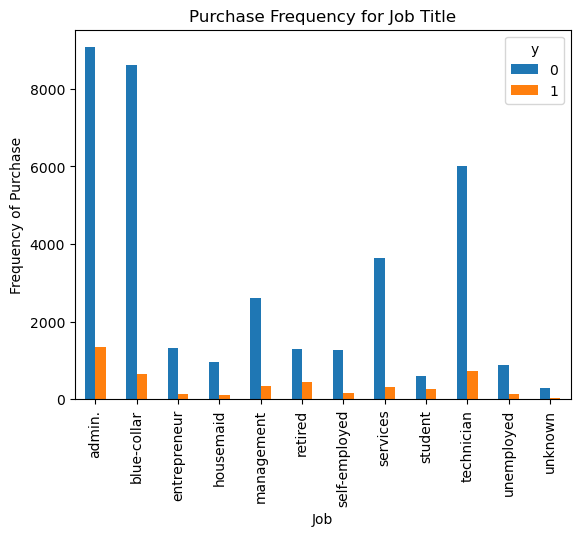

In [6]:
# look at purchase frequency by Job title
%matplotlib inline
pd.crosstab(campaign.job,campaign.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

## Splitting the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [124]:
# can only use numerical data with LogReg

# x-variables
x_var = ['age',
         #'job',
         #'marital',
         #'education',
         #'default',
         #'housing',
         #'loan',
         #'contact',
         #'month',
         #'day_of_week',
         'duration',
         'campaign',
         'pdays',
         'previous',
         #'poutcome',
         'emp_var_rate',
         'cons_price_idx',
         'cons_conf_idx',
         'euribor3m',
         'nr_employed']

In [125]:
y_data = campaign.loc[ : , 'y']
x_data = campaign.loc[ : , x_var]

In [126]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)


## Create a Logistic Regression model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# Model initialization
logreg = LogisticRegression()

In [14]:
# Fit the data(train the model)
logreg.fit(x_train, y_train)

/Users/marcusrabe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Predict
y_predicted = logreg.predict(x_test)

In [16]:
# model evaluation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [17]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_predicted)
print(conf)

[[8915  244]
 [ 688  450]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9159
           1       0.65      0.40      0.49      1138

    accuracy                           0.91     10297
   macro avg       0.79      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



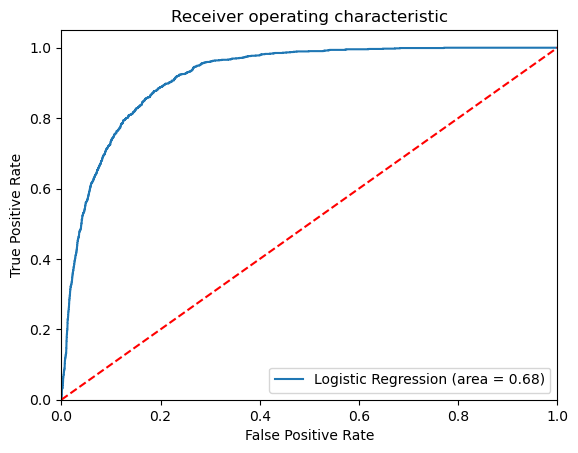

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Scaling

Some algorithms need the features to be scaled in the same range.

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
sc = StandardScaler()

# Fit the scaler
x_train = sc.fit_transform(x_train)

# Transform the data using the scaler
x_test = sc.transform(x_test)

In [21]:
# Retrain the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [22]:
# Predict
y_predicted = logreg.predict(x_test)

In [23]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [24]:
conf_matrix = confusion_matrix(y_test, y_predicted)
print(conf_matrix)

[[8915  244]
 [ 688  450]]


In [25]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9159
           1       0.65      0.40      0.49      1138

    accuracy                           0.91     10297
   macro avg       0.79      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



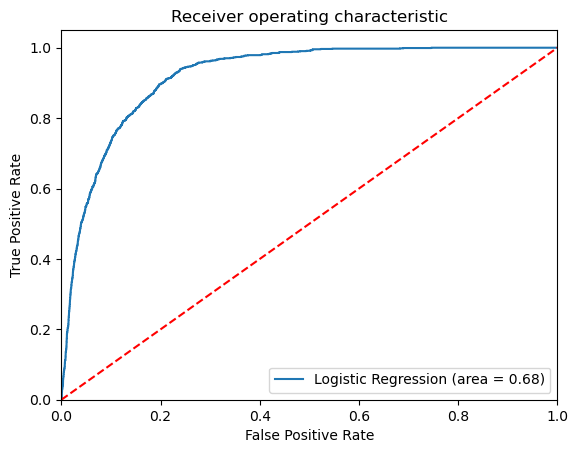

In [26]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Ordinal Encoding

In [32]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [33]:
campaign['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [53]:
# x-variables
x_var = ['age',
         'job',
         #'marital',
         #'education',
         #'default',
         #'housing',
         #'loan',
         #'contact',
         #'month',
         #'day_of_week',
         'duration',
         'campaign',
         'pdays',
         'previous',
         #'poutcome',
         'emp_var_rate',
         'cons_price_idx',
         'cons_conf_idx',
         'euribor3m',
         'nr_employed']

In [54]:
y_data = campaign.loc[ : , 'y']
x_data = campaign.loc[ : , x_var]

In [55]:
from sklearn.preprocessing import OrdinalEncoder

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
x_data[object_cols] = ordinal_encoder.fit_transform(x_data[object_cols])

In [57]:
x_data['job'].head()

0    1.0
1    9.0
2    4.0
3    7.0
4    5.0
Name: job, dtype: float64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [47]:
# Retrain the model
logreg.fit(x_train, y_train)

/Users/marcusrabe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Predict
y_predicted = logreg.predict(x_test)

In [49]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [50]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9159
           1       0.64      0.38      0.47      1138

    accuracy                           0.91     10297
   macro avg       0.78      0.67      0.71     10297
weighted avg       0.89      0.91      0.90     10297



## One-Hot encoding

In [58]:
y_data = campaign.loc[ : , 'y']
x_data = campaign.loc[ : , x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data[object_cols]))

/Users/marcusrabe/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
OH_cols.index

RangeIndex(start=0, stop=41188, step=1)

In [61]:
# One-hot encoding removed index; put it back
OH_cols.index = x_data.index

In [65]:
OH_cols.head()

0    1    2    3    4    5    6    7    8    9    10   11
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

In [68]:
# Ensure we have proper column names
OH_cols = OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1)

In [69]:
OH_cols.head()

admin.  blue-collar  entrepreneur  housemaid  management  retired  self-employed  services  student  technician  unemployed  unknown
0     0.0          1.0           0.0        0.0         0.0      0.0            0.0       0.0      0.0         0.0         0.0      0.0
1     0.0          0.0           0.0        0.0         0.0      0.0            0.0       0.0      0.0         1.0         0.0      0.0
2     0.0          0.0           0.0        0.0         1.0      0.0            0.0       0.0      0.0         0.0         0.0      0.0
3     0.0          0.0           0.0        0.0         0.0      0.0            0.0       1.0      0.0         0.0         0.0      0.0
4     0.0          0.0           0.0        0.0         0.0      1.0            0.0       0.0      0.0         0.0         0.0      0.0

In [70]:
# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data.drop(object_cols, axis=1)

In [71]:
# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(
            OH_X, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [73]:
# Retrain the model
logreg.fit(x_train, y_train)

/Users/marcusrabe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# Predict
y_predicted = logreg.predict(x_test)

In [75]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9159
           1       0.64      0.38      0.48      1138

    accuracy                           0.91     10297
   macro avg       0.79      0.68      0.71     10297
weighted avg       0.90      0.91      0.90     10297



## Feature importance

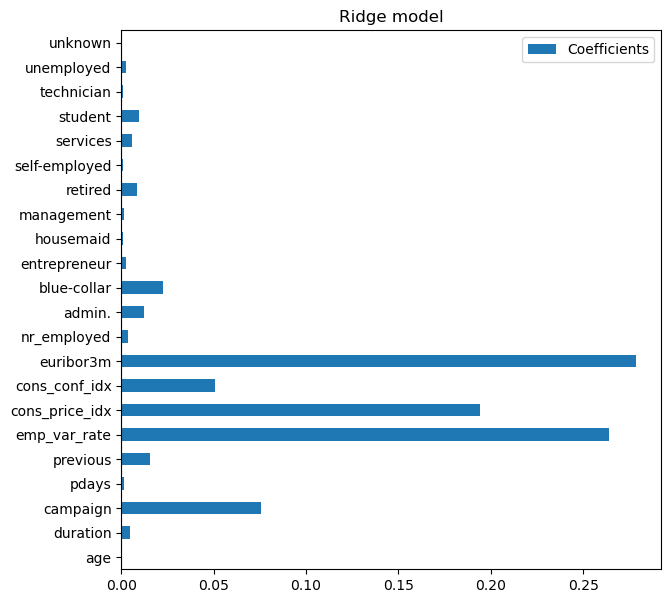

In [83]:
coefs = pd.DataFrame(
   np.abs(logreg.coef_)[0],
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Need to scale first in order to compare the features

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LogisticRegression())

model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

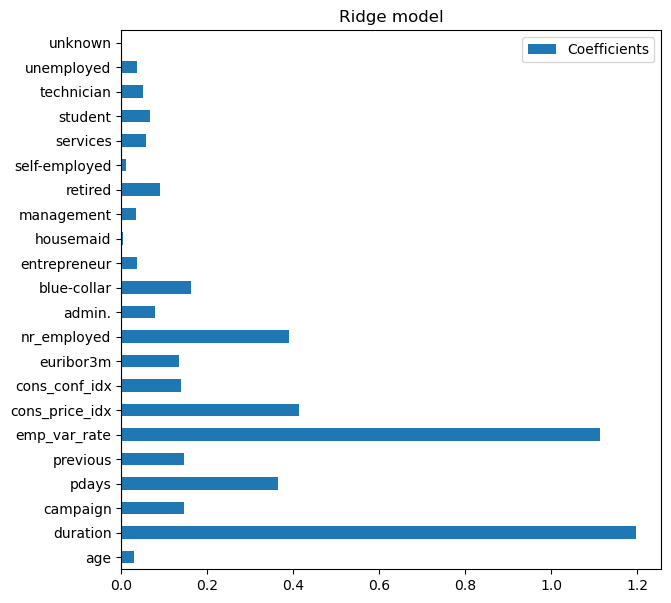

In [92]:
coefs = pd.DataFrame(
   np.abs(model.steps[1][1].coef_)[0],
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Balancing the classes using SMOTE

In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = x_var )
os_data_y= pd.DataFrame(data=os_data_y,
                        columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  54778
Number of no subscription in oversampled data 27389
Number of subscription 27389
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
# If the SMOTE shows an import error execute the following and restart the kernel
!pip install scikit-learn==1.2.2

In [29]:
os_data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             54778 non-null  float64
 1   duration        54778 non-null  float64
 2   campaign        54778 non-null  float64
 3   pdays           54778 non-null  float64
 4   previous        54778 non-null  float64
 5   emp_var_rate    54778 non-null  float64
 6   cons_price_idx  54778 non-null  float64
 7   cons_conf_idx   54778 non-null  float64
 8   euribor3m       54778 non-null  float64
 9   nr_employed     54778 non-null  float64
dtypes: float64(10)
memory usage: 4.2 MB


In [30]:
os_data_y.value_counts()

y
0    27389
1    27389
Name: count, dtype: int64

In [31]:
logreg = LogisticRegression()
logreg.fit(os_data_x, os_data_y.values.ravel())

# Predict
y_predicted = logreg.predict(x_test)

print('Accuracy on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

conf_matrix = confusion_matrix(y_test, y_predicted)
print(conf_matrix)

print(classification_report(y_test, y_predicted))

Accuracy on test set: 0.85
[[7810 1349]
 [ 187  951]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9159
           1       0.41      0.84      0.55      1138

    accuracy                           0.85     10297
   macro avg       0.70      0.84      0.73     10297
weighted avg       0.91      0.85      0.87     10297



/Users/marcusrabe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/marcusrabe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
# Model initialization

tree = DecisionTreeClassifier()

In [96]:
# Fit the data(train the model)

tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
# Predict
y_predicted = tree.predict(x_test)

In [100]:
# model evaluation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(tree.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [101]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      9159
           1       0.50      0.53      0.51      1138

    accuracy                           0.89     10297
   macro avg       0.72      0.73      0.72     10297
weighted avg       0.89      0.89      0.89     10297



## Visualizing the Tree

In [103]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.6 MB/s eta 0:00:00


In [113]:
import sys
!conda install --yes --prefix {sys.prefix} python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.0



## Package Plan ##

  environment location: /Users/marcusrabe/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.12.12 |       hca03da5_0         127 KB
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    certifi-2023.11.17         |  py311hca03da5_0         160 KB
    expat-2.5.0                |       h313beb8_0         144 KB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pr

In [104]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24555 sha256=86f57f0d7fe9cb395822a911674c291355033b12cbd9d0c210d1cb29e59ba8a5
  Stored in directory: /Users/marcusrabe/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [106]:
!pip install six

In [107]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [114]:
dot_data = StringIO()
export_graphviz(tree,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = OH_X.columns,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307207 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307207 to fit



## Improving the tree

In [127]:
# Model initialization

# default criterion is 'gini', 'entropy' means information gain

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3)

In [128]:
# Fit the data(train the model)

tree.fit(x_train, y_train)

ValueError: could not convert string to float: 'admin.'

In [117]:
# Predict
y_predicted = tree.predict(x_test)

In [119]:
# model evaluation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(tree.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [118]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9159
           1       0.58      0.41      0.48      1138

    accuracy                           0.90     10297
   macro avg       0.76      0.69      0.71     10297
weighted avg       0.89      0.90      0.89     10297



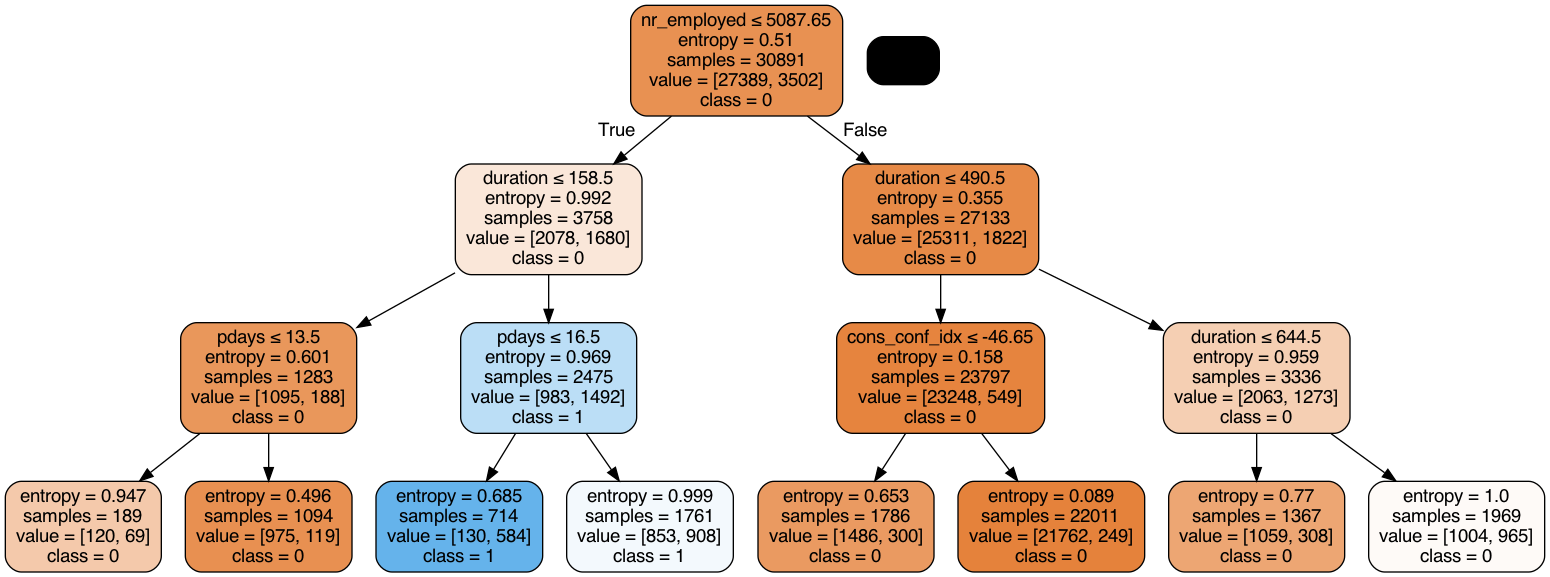

In [120]:
dot_data = StringIO()
export_graphviz(tree,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = OH_X.columns,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())